# Hands-on with TensorFlow
 this demo, let's see how TensorFlow works and build a deep neural network model using the MNIST dataset.

## Part A

### Step 1: Import TensorFlow

- Import TensorFlow and check its version


`pip install tensorflow` (it'll take about 20 to 1 min depending on the machine)

In [45]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [46]:
#import the rest of the libraries
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Certainly! This code snippet demonstrates the use of TensorFlow and Keras to build, train, and evaluate a simple neural network model for image classification. The example uses the popular MNIST dataset, which contains handwritten digit images.

Here's a breakdown of each section of the code:

1. **Model Definition**:
   - `model = tf.keras.models.Sequential([...])`: This creates a sequential model, a linear stack of layers. The model is defined with the following layers:
     - `Flatten`: This layer converts the 28x28 input images into a 1D array (784 elements).
     - `Dense`: A fully connected layer with 128 neurons and ReLU activation function.
     - `Dropout`: A regularization technique that randomly sets a fraction (0.2) of the input units to 0 at each update during training.
     - Another `Dense` layer with 10 neurons (output layer) representing the logits (raw scores) for 10 classes (digits 0-9).

2. **Making Predictions**:
   - `predictions = model(x_train[:1]).numpy()`: This generates predictions (logits) for the first training example (x_train[0]). The `numpy()` method converts the tensor to a NumPy array.
   - `tf.nn.softmax(predictions).numpy()`: This applies the softmax function to the logits to get class probabilities. It shows the predicted class probabilities for the first training example.

3. **Loss Function**:
   - `loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: This initializes the loss function, which computes the sparse categorical cross-entropy loss between the true labels and the predicted logits.
   - `loss_fn(y_train[:1], predictions).numpy()`: This calculates the loss for the first training example.

4. **Model Compilation**:
   - `model.compile(...)`: This compiles the model, specifying the optimizer ('adam'), loss function (`loss_fn`), and evaluation metric ('accuracy').

5. **Model Training**:
   - `model.fit(x_train, y_train, epochs=5)`: This trains the model using the training data (`x_train` and `y_train`) for 5 epochs.

6. **Model Evaluation**:
   - `model.evaluate(x_test, y_test, verbose=2)`: This evaluates the trained model on the test data (`x_test` and `y_test`) and displays the test loss and accuracy.

7. **Probability Model**:
   - `probability_model = tf.keras.Sequential([...])`: This creates a new model by adding a `Softmax` layer on top of the previously defined model. This layer converts the logits into class probabilities.
   - `probability_model(x_test[:3])`: This applies the probability model to the first 3 test examples, providing class probabilities for each.

Overall, the code demonstrates the complete workflow of defining a neural network model, training it, evaluating its performance, and making predictions on new data using TensorFlow and Keras. The example showcases basic concepts in deep learning, such as layers, loss functions, optimization, and model evaluation.

![fl](https://testerstories.com/files/ai_and_ml/ml-mnist-2d-to-1d.png)

### Step 2: Load the MNIST Dataset

- MNIST digits classification dataset
- MNIST is ‘Modified National Institute of Standards and Technology. 
- This dataset consists of 70K greyscale images of handwritten digits from 0 to 9 and it provides a pavement for testing image processing systems. 
- This is considered to be the ‘hello world program in Machine Learning’ which involves Deep Learning.
- Preparing the dataset:
    - Load the MNIST dataset 
    - Normalize the input data by dividing the train and test sets by 255. (The pixel values of the images are scaled between 0 and 1 by dividing by 255)

In [47]:
#only for mac or when you get an ssl warning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error


In [48]:
mnist = tf.keras.datasets.mnist
mnist 
mnist.load_data() #mnist array

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [49]:
#split the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [50]:
x_train.max(), x_train.min()

(255, 0)

In [51]:
x_train.shape # 60k images and 28 x 28 pixels

(60000, 28, 28)

In [52]:
#The pixel values of the images are scaled between 0 and 1 by dividing by 255.0. for normalization

x_train, x_test = x_train / 255.0, x_test / 255.0

- 28 x 28 = 784 small image file compared to standard
- in a lot of cases you're be dealing with HD images. 1080 x 1980 = around 2M 
- Plus, you'll have RGB so 3 layers. 3 x 1080 x 1980 = around 6M 
- The division by 255 is a normalization step. The MNIST dataset consists of grayscale images, where each pixel intensity ranges from 0 to 255 (with 0 being black and 255 being white). By dividing each pixel value by 255, the pixel intensities are scaled to the range [0, 1].

In [53]:
print(x_train.nbytes/1000000)

376.32


__Observation:__
- The dataset has been downloaded.
- It's a large dataset - about 376MB just for X train

## Step 3: Building the Neural Network Model

- Create a Sequential model with Flatten, Dense, and Dropout layers


In [54]:
# style 1 syntax
model = models.Sequential(
    [
        layers.Flatten(input_shape=(28,28)), #first layer: flattened input
        layers.Dense(128, activation='relu'), #second layer: hidden layer with ReLU activation function
        layers.Dropout(0.2), #for regularization to address overfitting
        layers.Dense(10)# use len(np.unique(y_train)) to automate
    ]
)


In [34]:
# style 2
model = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape=(28, 28)),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(10)
])

- `model = tf.keras.models.Sequential([...])`: This creates a sequential model (sequentially creating layers), a linear stack of layers. The model is defined with the following layers:
     - `Flatten`: This layer converts the 28x28 input images into a 1D array (784 elements).
     - `Dense`: A fully connected layer with 128 neurons and ReLU activation function. 
          - **ReLU** is a **Re**ctified **L**inear **U**nit that is an activation function that introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue.
     - `Dropout`: A regularization technique that randomly sets a fraction (0.2) of the input units to 0 at each update during training.
     - Another `Dense` layer with 10 neurons (output layer) representing the logits (raw scores) for 10 classes (digits 0-9). Probability score. You can add an activation funciton here or derive results later.
- Keep in mind there are other methods of creating NN (other than Sequential)
- Later we'll see how to use functional APIs with more complexity

In [35]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- It gives how many outputs, neurons, biases, and weight values
- how was it derived?
- The summary above gives the count of input, outputs, layers, biases, and weights
    - 784 (inputs) x 128 (weights) x 128 (biases) = 100480
    - 128 (weights) x 10 (outputs) + 10 (biases)

## Step 4: Get Predictions from the Model

- Get the predictions from the model using the train data for one column, as the optimizer is not yet applied


In [36]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.8071815 ,  0.27050403, -0.7483404 , -0.63632756, -0.41645598,
         0.8322607 , -0.29392755,  0.01478674,  0.31196675, -0.30059043]],
      dtype=float32)

__Observation:__
- An array of predicted values is displayed.
- It's raw values coming out of the 10 neurons
- It's hard to interpret if we use it early here
- we need ot convert output into classification format (1,2,3,etc..)

## Step 5: Apply Softmax Activation to the Predictions

- Apply softmax activation to the predictions and print the output in terms of probabilities
- This applies the softmax function to the logits to get class probabilities. It shows the predicted class probabilities for the first training example.


![sm](https://www.researchgate.net/publication/348703101/figure/fig5/AS:983057658040324@1611390618742/Graphic-representation-of-the-softmax-activation-function.ppm)

In [37]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.19698942, 0.11517728, 0.04158037, 0.04650877, 0.05794606,
        0.20199224, 0.0654994 , 0.08918878, 0.12005325, 0.06506445]],
      dtype=float32)>

What we get above is a tensor object not a numpy array

In [38]:
tf.nn.softmax(predictions).numpy()

array([[0.19698942, 0.11517728, 0.04158037, 0.04650877, 0.05794606,
        0.20199224, 0.0654994 , 0.08918878, 0.12005325, 0.06506445]],
      dtype=float32)

__Observation:__
- The predicted values in terms of probabilities are displayed as an array.
- we can get the probabilities of the first prediction

In [39]:
tf.nn.softmax(predictions).numpy()

array([[0.19698942, 0.11517728, 0.04158037, 0.04650877, 0.05794606,
        0.20199224, 0.0654994 , 0.08918878, 0.12005325, 0.06506445]],
      dtype=float32)

- You can see we have 
- if we add up all the values we get a value close to 1

In [16]:
tf.nn.softmax(predictions).numpy()[0].sum()

0.99999994

- Results above don't look good because the model is unsure.
- we need to improve the model using backpropagation
- First we get the loss funciton

## Step 6: Define the Loss Function

- Let's create a loss function for the model.
- Next, let's define the SparseCategoricalCrossentropy loss function.
- This initializes the loss function, which computes the sparse categorical cross-entropy loss between the true labels and the predicted logits.


In [40]:
#This initializes the loss function, which computes the sparse categorical cross-entropy loss between the true labels and the predicted logits. 
# we call those logits becuase we don't have an activation function associated with the last layer (output)
#for classification (categorical)
# binary classification for each category for example for num 3
# [0 0 1 0 0 0 0 0 0]
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [41]:
loss_fn(y_train[:1], predictions).numpy()

1.5995259

__Observation:__
- Here,the value is 2.061.

## Step 7: Compile the Model

- Now, compile the model with the Adam optimizer, the loss function, and the accuracy metric

In [42]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

__Observation:__
- This compiles the model, specifying the optimizer ('adam'), loss function (loss_fn), and evaluation metric ('accuracy').

- `optimizer`: The optimization algorithm, in this case, 'adam', which is a popular gradient-based optimization algorithm.
- `loss`: The loss function, 'sparse_categorical_crossentropy', appropriate for multi-class classification tasks.
- `metrics`: The evaluation metric, 'accuracy', to monitor during training.

## Step 8: Train the Model

- Fit the model using the training data for 5 epochs


In [43]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 1s 767us/step - loss: 0.3324 - accuracy: 0.9035 - val_loss: 0.1556 - val_accuracy: 0.9556
Epoch 2/5
1500/1500 [==============================] - 1s 790us/step - loss: 0.1609 - accuracy: 0.9517 - val_loss: 0.1176 - val_accuracy: 0.9647
Epoch 3/5
1500/1500 [==============================] - 1s 685us/step - loss: 0.1198 - accuracy: 0.9636 - val_loss: 0.0988 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 1s 745us/step - loss: 0.0955 - accuracy: 0.9706 - val_loss: 0.0870 - val_accuracy: 0.9732
Epoch 5/5
1500/1500 [==============================] - 1s 829us/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0812 - val_accuracy: 0.9747


__Observations:__
- The model fits the data.
- Here, we can see that the accuracy is increased by different epochs.
- validation vs training accuracy
- Accuracy	Training	Measures model performance on seen training data
- Val_accuracy	Validation	Measures model performance on unseen validation data

## Step 9: Evaluate the Model

- Evaluate the model using the testing data and print the results


In [21]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0787 - accuracy: 0.9766 - 154ms/epoch - 493us/step


[0.07870649546384811, 0.9765999913215637]

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
- verbose=0 will show you nothing (silent)
- verbose=1 will show you an animated progress bar 
- verbose=2 will just mention the number of epoch 

__Observation:__

- The accuracy score is 0.9779, and the loss is 0.071.

In [22]:
history.history

{'loss': [0.3228992819786072,
  0.15717418491840363,
  0.11904983222484589,
  0.09592556953430176,
  0.08046696335077286],
 'accuracy': [0.90625,
  0.9540208578109741,
  0.9642500281333923,
  0.9701250195503235,
  0.9751666784286499],
 'val_loss': [0.15629468858242035,
  0.12684710323810577,
  0.1018824353814125,
  0.09254162758588791,
  0.0852387472987175],
 'val_accuracy': [0.9557499885559082,
  0.9620833396911621,
  0.9681666493415833,
  0.9721666574478149,
  0.9749166369438171]}

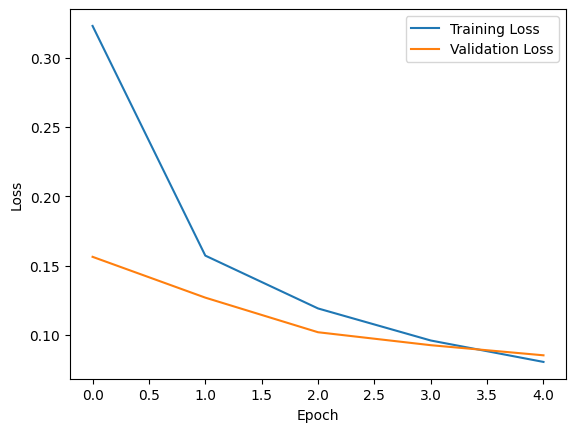

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


If the training loss and validation loss both decline as the number of epochs increases, it generally indicates that the model is learning and improving its performance over time. This is a positive sign and suggests that the model is converging towards a good solution.

Let's break down what the declining loss curves in the visualization mean:

- **Training Loss Curve**: This curve shows how the training loss decreases as the number of epochs increases. The training loss measures how well the model is fitting the training data. A decreasing training loss indicates that the model is getting better at predicting the correct labels for the training examples.

- **Validation Loss Curve**: This curve shows how the validation loss decreases as the number of epochs increases. The validation loss measures how well the model generalizes to unseen data (validation set). A decreasing validation loss indicates that the model is not only memorizing the training data but also learning to make accurate predictions on new, unseen data.

If both curves decline and continue to decrease without any significant increase, it suggests that the model is learning the underlying patterns in the data and is becoming better at making accurate predictions. This is a positive trend, indicating that the model is improving and is on the path to achieving good generalization.

However, it's important to interpret the curves with caution:

- **Overfitting**: If the training loss continues to decrease while the validation loss starts to increase, it might be a sign of overfitting. Overfitting occurs when the model becomes too specialized in learning noise in the training data, leading to poor performance on new data. It's important to monitor validation loss to detect overfitting.

- **Underfitting**: If both training and validation loss remain high or decrease too slowly, the model might be underfitting. Underfitting occurs when the model is too simple to capture the underlying patterns in the data.

To summarize, in machine learning, the goal is to find the point at which the validation loss stops decreasing or starts to increase, which suggests that the model's performance on new data might degrade. This point usually corresponds to the optimal balance between model complexity and generalization.

In [24]:
plt.plot(mod_hist.history['accuracy'], label='Training accuracy')
plt.plot(mod_hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('accuracy')

NameError: name 'mod_hist' is not defined

## Step 10: Create a Probability Model

- Create a probability model by adding the Softmax layer to the existing model



In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

- And, get the predictions using the test data

In [ ]:
probability_model(x_test[:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[5.3754803e-08, 4.6909925e-08, 1.6535176e-05, 1.0914378e-03,
        9.0408687e-11, 2.8083736e-08, 9.3070896e-13, 9.9888831e-01,
        6.9452693e-07, 2.8518950e-06],
       [3.3467032e-07, 6.7986408e-04, 9.9927551e-01, 4.2351548e-05,
        3.5844266e-14, 1.0551089e-06, 8.5224990e-08, 3.5961690e-15,
        7.7306726e-07, 8.0365261e-13],
       [4.3791101e-06, 9.9870956e-01, 1.1671810e-04, 4.3136224e-05,
        2.4960155e-04, 2.5314115e-05, 7.9682330e-05, 3.1380221e-04,
        4.5572623e-04, 2.0584930e-06]], dtype=float32)>

__Observation:__
- Here, we have the probabilities for the first three observations and different classes.

In [ ]:
# Make predictions on the test data
predictions = model.predict(x_test)
import numpy as np
# Convert probabilities to class labels using argmax
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 389us/step


In [ ]:
predicted_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

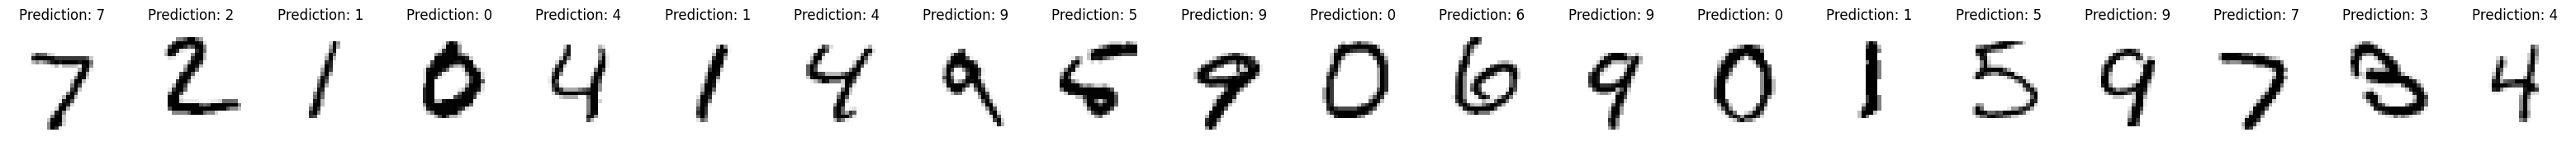

In [ ]:
# prediction vs features comparison
num_samples = 20
sample_images = x_test[:num_samples].reshape(num_samples,28,28)
sample_labels = predicted_classes[:num_samples]

plt.figure(figsize=(num_samples*2,2))


for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(-1*sample_images[i], cmap='gray')
    plt.title('Prediction: {}'.format(sample_labels[i]))
    plt.axis('off')

In [ ]:
misclassified_indices = np.nonzero(predicted_classes != y_test) # Use np.nonzero
misclassified_indices

(array([ 247,  321,  340,  359,  381,  445,  448,  479,  495,  578,  582,
         619,  646,  684,  691,  707,  717,  720,  740,  810,  874,  877,
         882,  938,  947,  956,  965, 1014, 1039, 1112, 1128, 1226, 1232,
        1242, 1247, 1260, 1289, 1299, 1319, 1364, 1378, 1393, 1425, 1500,
        1522, 1530, 1549, 1553, 1609, 1621, 1681, 1709, 1717, 1737, 1751,
        1754, 1790, 1813, 1823, 1850, 1878, 1901, 1941, 1987, 2004, 2016,
        2024, 2043, 2053, 2070, 2098, 2109, 2129, 2130, 2135, 2145, 2182,
        2185, 2293, 2333, 2387, 2406, 2414, 2422, 2433, 2488, 2607, 2648,
        2654, 2720, 2760, 2771, 2810, 2877, 2915, 2921, 2927, 2939, 2953,
        3005, 3060, 3073, 3115, 3117, 3225, 3376, 3503, 3520, 3542, 3549,
        3558, 3559, 3567, 3597, 3604, 3674, 3751, 3757, 3780, 3796, 3808,
        3811, 3818, 3838, 3853, 3869, 3893, 3902, 3906, 3926, 3941, 3943,
        3976, 3985, 4000, 4027, 4065, 4078, 4163, 4176, 4199, 4224, 4248,
        4289, 4306, 4355, 4360, 4433, 

(-0.5, 27.5, 27.5, -0.5)

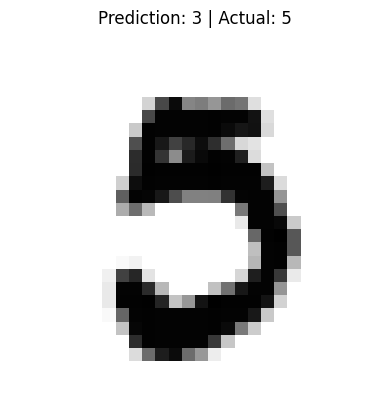

In [108]:
miss_list = [   8,  104,  151, 5835, 6598, 9982, 4880]
len(miss_list)

plt.figure(figsize=(20,2))

for idx,i in enumerate(miss_list):
    plt.subplot(1, len(miss_list), idx+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Pred: {predicted_classes[i]} | Actual: {y_test[i]}')
    plt.axis('off')

___

## Learning Rate
![LR](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In the context of neural networks and TensorFlow, the learning rate is a hyperparameter that controls the step size at which the model's weights are updated during the training process. It determines the amount by which the weights are adjusted in the direction of minimizing the loss function.

The learning rate plays a crucial role in the convergence and performance of neural networks. If the learning rate is too small, the training process will be slow, and the model may get stuck in a suboptimal solution or plateaus. On the other hand, if the learning rate is too large, the training process may diverge, and the model may fail to converge or reach an optimal solution.

In TensorFlow, the learning rate is typically specified when creating the optimizer object, which is responsible for updating the model's weights during training. For example, when using the `tf.train.GradientDescentOptimizer`, you can specify the learning rate as follows:

```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
```

In this example, the learning rate is set to 0.01.

Additionally, TensorFlow provides various techniques to adjust the learning rate during training, such as:

1. **Learning Rate Decay**: The learning rate can be decreased over time, which can help the model converge more efficiently. TensorFlow provides various decay strategies, such as exponential decay, piecewise constant decay, and cosine decay.

2. **Learning Rate Schedulers**: TensorFlow also offers learning rate schedulers, which allow you to define custom schedules for adjusting the learning rate during training. For example, you can use a cyclical learning rate schedule or a warmup learning rate schedule.

3. **Adaptive Learning Rate Optimization Algorithms**: TensorFlow includes optimization algorithms like Adam, RMSProp, and Adagrad, which adapt the learning rate for each parameter based on the gradient history, allowing for faster convergence and better performance.

The choice of the learning rate and the strategy for adjusting it during training can significantly impact the model's performance and convergence. It is often recommended to tune the learning rate using techniques like grid search or random search, along with other hyperparameters, to find the optimal configuration for your specific problem and dataset.

It's worth noting that the learning rate is not only applicable to neural networks but also to other machine learning models trained with gradient-based optimization algorithms, such as linear regression, logistic regression, and support vector machines.

- Now, let's wrap scikit learn and build a neural network with 500 epochs with the Keras Classifier.

`pip install scikeras`

In [42]:
import tensorflow as tf
#tf.keras.layers.Wrapper

#https://adriangb.com/scikeras/stable/migration.html
#keras_clf = tf.keras.layers.Wrapper.scikit_learn.KerasClassifier( build_nn,epochs=500,verbose=False)
#code was migrated to
from scikeras.wrappers import KerasClassifier, KerasRegressor
keras_clf = KerasClassifier( build_nn,epochs=500,verbose=False)

`skikeras.wrappers` is a module provided by the `skikeras` library, which acts as a bridge between the scikit-learn and Keras/TensorFlow ecosystems. It allows you to use Keras/TensorFlow models as scikit-learn estimators, enabling easy integration with scikit-learn's utilities, such as model selection, evaluation, and preprocessing.

The `skikeras.wrappers` module provides two main classes:

1. **`KerasClassifier`**: This class is a scikit-learn compatible wrapper for Keras/TensorFlow classification models. It allows you to use a Keras model for classification tasks, while benefiting from scikit-learn's utilities like cross-validation, model selection, and performance evaluation.

2. **`KerasRegressor`**: This class is a scikit-learn compatible wrapper for Keras/TensorFlow regression models. It allows you to use a Keras model for regression tasks, while leveraging scikit-learn's utilities.

These wrappers work by encapsulating a Keras model within a scikit-learn estimator interface. This means that you can instantiate a `KerasClassifier` or `KerasRegressor` object with your Keras model, and then use it like any other scikit-learn estimator, such as `LogisticRegression` or `RandomForestRegressor`.


In [43]:
keras_clf._estimator_type = "classifier"

### Step 3: Create the Voting Classifier

- Combine the classifiers using sklearn's VotingClassifier with soft voting


In [44]:
voting = VotingClassifier(
             estimators=[('lr', log_clf),
                         ('rf', rnd_clf),
                         ('svc', svm_clf),
                         ('keras',keras_clf)], 
             voting='soft',
             flatten_transform=True)

- The classifiers are combined with soft voting.

**voting{‘hard’, ‘soft’}, default=’hard’**
 
- If ‘hard’, uses predicted class labels for majority rule voting. 
- If ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.



## Step 4: Train and Evaluate the Classifiers

- Train the voting classifier and each individual classifier
- Make predictions on the test set and calculate the accuracy for each classifier


In [45]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('keras',
                              KerasClassifier(epochs=500, model=<function build_nn at 0x285d2a980>, verbose=False))],
                 voting='soft')

- Consider voting with VotingClassifier and estimator
- The first is LogisticRegression, the second is RandomForest, the third is SVM, the fourth is KerasClassifier, and the fifth is VotingClassifier.

In [46]:
for clf in (log_clf, rnd_clf, svm_clf, keras_clf, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
KerasClassifier 0.896
VotingClassifier 0.912


__Observation:__

- As shown above, LogisticRegression is at 86% accuracy, RandomForest is at 89%, SVM is at 89%, KerasClassifier is at 89%, and VotingClassifier is at 92%.

In [13]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your data (X: features, y: target variable)
X,y=make_moons(n_samples=500,noise=0.30,random_state=42)

# Define base models (scikit-learn classifiers)
estimators = [
    LogisticRegression(solver='lbfgs'),
    SVC(kernel='rbf')
]

# Define the meta-model (TensorFlow neural network)
def create_meta_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Define the stacking classifier
meta_estimator = StackingClassifier(estimators, meta_estimator=create_meta_model)

# Perform K-fold cross-validation
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y_test[test_index]

  # Train the base models
  for estimator in estimators:
    estimator.fit(X_train, y_train)

  # Get predictions from base models
  base_model_preds = [estimator.predict(X_train) for estimator in estimators]
  base_model_preds_test = [estimator.predict(X_test) for estimator in estimators]

  # Combine predictions as new features (concatenate them)
  X_train_stacked = np.concatenate(base_model_preds, axis=1)
  X_test_stacked = np.concatenate(base_model_preds_test, axis=1)

  # Train the meta-model on stacked features
  meta_estimator.fit(X_train_stacked, y_train)

  # Make predictions on the test set with the meta-model
  y_pred = meta_estimator.predict(X_test_stacked)

  # Calculate the accuracy
  accuracy = np.mean(y_pred == y_test)
  scores.append(accuracy)

# Print the average accuracy
print("Average Accuracy:", np.mean(scores))


TypeError: StackingClassifier.__init__() got an unexpected keyword argument 'meta_estimator'